## Introduction: Business Problem<a name="Introduction"></a>

As an Auto Insurance company, it's critical to understand what could be the factors that impact the severity of car accidents.  Finding these factors would help the insurance company to price its products properly.  In addition, based on this analysis, the insurance company could also find risk control solutions to mitigate and reduce the severity of car accidents.

In this project, we will study the car accident data and see the severity level of car accidents has any relationship with various weather patterns and factors.  We'll do regression analysis of individual weather factors as well as multiple regression.  We'll attempt to use Ridge Regression and Grid Search to improve the models.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset <a name="Data"></a>

The car accident dataset we use in this project covers 49 continguous states of the United States of America for the period from Feb 2016 to June 2020.  This dataset contains more than 3.5 million accident records with data captured by various entities such as the US and state departments of transportation, law enforcement agencies, etc.  The dataset also contains weather conditions, day light conditions (like Sunrise, Twilight,etc.).  

Credits/Acknowledgements:

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.<p>
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

In [2]:
csv_path = '~/OneDrive/python_learning/Data/US_Accidents_June20.csv'

In [3]:
car_accident = pd.read_csv(csv_path)

## Data Cleanup <a name="Data Cleanup"></a>

Here's the original table structure with 49 attributes: 
Here's the original table structure with 49 attributes: 
<table style="width:100%">
    <style>
table {float:left}
</style>
    <colgroup>
       <col span="1" style="width: 5%;">
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 80%;">
    </colgroup>
  <tr>
    <th align="left">#</th>
    <th align="left">Attribute</th> 
    <th align="left">Description</th>
  </tr>
  <tr>
    <td>1</td>
    <td>ID</td> 
    <td>This is a unique identifier of the accident record.</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Source</td> 
    <td>Indicates source of the accident report (i.e. the API which reported the accident.)</td>
    </tr>
  <tr>
    <td>3</td>
    <td>TMC</td> 
    <td>A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.</td>
    </tr>  
  <tr>
   <td>4</td>
    <td>Severity</td> 
    <td>Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay.)</td>
    </tr>
  <tr>
    <td>5</td>
    <td>Start_Time</td> 
    <td>Shows start time of the accident in local time zone.</td>
    </tr>
  <tr>
    <td>6</td>
    <td>End_Time</td> 
    <td>Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.</td>
    </tr>
  <tr>
    <td>7</td>
    <td>Start_Lat</td> 
    <td>Shows latitude in GPS coordinate of the start point.</td>
    </tr>
  <tr>
    <td>8</td>
    <td>Start_Lng</td> 
    <td>Shows longitude in GPS coordinate of the start point.</td>
    </tr>
  <tr>
    <td>9</td>
    <td>End_Lat</td> 
    <td>Shows latitude in GPS coordinate of the end point.</td>
    </tr>
  <tr>
    <td>10</td>
    <td>End_Lng</td> 
    <td>Shows longitude in GPS coordinate of the end point.</td>
    </tr>
  <tr>
    <td>11</td>
    <td>Distance(mi)</td> 
    <td>The length of the road extent affected by the accident.</td>
    </tr>
  <tr>
    <td>12</td>
    <td>Description</td> 
    <td>Shows natural language description of the accident.</td>
    </tr>
  <tr>
    <td>13</td>
    <td>Number</td> 
    <td>Shows the street number in address field.</td>
    </tr>
  <tr>
    <td>14</td>
    <td>Street</td> 
    <td>Shows the street name in address field.</td>
    </tr>
  <tr>
    <td>15</td>
    <td>Side</td> 
    <td>Shows the relative side of street (Right/Left) in address field.</td>
    </tr>
  <tr>
    <td>16</td>
    <td>City</td> 
    <td>Shows the city in address field.</td>
    </tr>
  <tr>
    <td>17</td>
    <td>County</td> 
    <td>Shows the county in address field.</td>
    </tr>
  <tr>
    <td>18</td>
    <td>State</td> 
    <td>Shows the State in address field.</td>
    </tr>
  <tr>
    <td>19</td>
    <td>Zipcode</td> 
    <td>Shows the zipcode in address field.</td>
    </tr>
  <tr>
    <td>20</td>
    <td>Country</td> 
    <td>Shows the country in address field.</td>
    </tr>
  <tr>
    <td>21</td>
    <td>Timezone</td> 
    <td>Shows timezone based on the location of the accident (eastern, central, etc.).</td>
    </tr>
  <tr>
    <td>22</td>
    <td>Airport_Code</td> 
    <td>Denotes an airport-based weather station which is the closest one to location of the accident.</td>
    </tr>
  <tr>
    <td>23</td>
    <td>Weather_Timestamp</td> 
    <td>Shows the time-stamp of weather observation record (in local time).</td>
    </tr>
  <tr>
    <td>24</td>
    <td>Temperature(F)</td> 
    <td>Shows the temperature (in Fahrenheit).</td>
    </tr>
  <tr>
    <td>25</td>
    <td>Wind_Chill(F)</td> 
    <td>Shows the wind chill (in Fahrenheit).</td>
    </tr>
  <tr>
    <td>26</td>
    <td>Humidity(%)</td> 
    <td>Shows the humidity (in percentage).</td>
    </tr>
  <tr>
    <td>27</td>
    <td>Pressure(in)</td> 
    <td>Shows the air pressure (in inches).</td>
    </tr>
  <tr>
    <td>28</td>
    <td>Visibility(mi)</td> 
    <td>Shows visibility (in miles)</td>
    </tr>
  <tr>
    <td>29</td>
    <td>Wind_Direction</td> 
    <td>Shows wind direction</td>
    </tr>
  <tr>
    <td>30</td>
    <td>Wind_Speed(mph)</td> 
    <td>Shows wind speed (in miles per hour)</td>
    </tr>
  <tr>
    <td>31</td>
    <td>Precipitation(in)</td> 
    <td>Shows precipitation amount in inches, if there is any.</td>
    </tr>
  <tr>
    <td>32</td>
    <td>Weather_Condition</td> 
    <td>Shows the weather condition (rain, snow, thunderstorm, fog, etc.)</td>
    </tr>
  <tr>
    <td>33</td>
    <td>Amenity</td> 
    <td>A POI annotation which indicates presence of amenity in a nearby location.</td>
    </tr>
  <tr>
    <td>34</td>
    <td>Bump</td> 
    <td>A POI annotation which indicates presence of speed bump or hump in a nearby location.</td>
    </tr>
  <tr>
    <td>35</td>
    <td>Crossing</td> 
    <td>A POI annotation which indicates presence of presence of crossing in a nearby location.</td>
    </tr>
  <tr>
    <td>36</td>
    <td>Give_Way</td> 
    <td>A POI annotation which indicates presence of presence of give_way in a nearby location.</td>
    </tr>
  <tr>
    <td>37</td>
    <td>Junction</td> 
    <td>A POI annotation which indicates presence of presence of junction in a nearby location.</td>
    </tr> 
  <tr>
    <td>38</td>
    <td>No_Exit</td> 
    <td>A POI annotation which indicates presence of presence of no exit in a nearby location.</td>
    </tr>
  <tr>
    <td>39</td>
    <td>Railway</td> 
    <td>A POI annotation which indicates presence of presence of railway in a nearby location.</td>
    </tr>
  <tr>
    <td>40</td>
    <td>Roundabout</td> 
    <td>A POI annotation which indicates presence of presence of roundabout in a nearby location.</td>
    </tr>  
  <tr>
    <td>41</td>
    <td>Station</td> 
    <td>A POI annotation which indicates presence of presence of station in a nearby location.</td>
    </tr>
  <tr>  
    <td>42</td>
    <td>Stop</td> 
    <td>A POI annotation which indicates presence of presence of stop in a nearby location.</td>
    </tr>
  <tr>  
    <td>43</td>
    <td>Traffic_Calming</td> 
    <td>A POI annotation which indicates presence of presence of traffic calming in a nearby location.</td>
    </tr>
  <tr>  
    <td>44</td>
    <td>Traffic_Signal</td> 
    <td>A POI annotation which indicates presence of presence of traffic signal in a nearby location.</td>
    </tr>
  <tr>  
    <td>45</td>
    <td>Turning_Loop</td> 
    <td>A POI annotation which indicates presence of presence of turning loop in a nearby location.</td>
    </tr>
  <tr>  
    <td>46</td>
    <td>Sunrise_Sunset</td> 
    <td>Shows the period of day (i.e. day or night) based on sunrise/sunset.</td>
    </tr>
  <tr>  
    <td>47</td>
    <td>Civil_Twilight</td> 
    <td>Shows the period of day (i.e. day or night) based on civil twilight.</td>
    </tr>
  <tr>  
    <td>48</td>
    <td>Nautical_Twilight</td> 
    <td>Shows the period of day (i.e. day or night) based on nautical twilight.</td>
    </tr>
<tr>  
    <td>49</td>
    <td>Astronomical_Twilight</td> 
    <td>Shows the period of day (i.e. day or night) based on astronomical twilight.</td>
    </tr>

</table>



In this project, we're focusing on the relationship, if any, between the severity of car accidents with weather conditions, POI elements and Period of Day. We'll need to clean up those data that are irrelevant, namely, Source, TMC, Start_Time, End_Time, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(m), Description, Number, Street, Side, City, County,, Zipcode, Country, Timezone, Airport_Code, Weather_Timestamp, Civil_Twilight, Nautical_Twilight, and Astronomical_Twilight.

Dropping unnecessary columns

In [4]:
car_accident.drop(columns=['Source','TMC','Start_Time','End_Time','Start_Lat','Start_Lng',
                           'End_Lat','End_Lng', 'Distance(mi)','Description','Number','Street','City',
                           'County','Zipcode','Country','Timezone','Airport_Code','Weather_Timestamp',
                           'Civil_Twilight','Nautical_Twilight',
                           'Astronomical_Twilight'], inplace=True)

In [5]:
car_accident.columns

Index(['ID', 'Severity', 'Side', 'State', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')

In [6]:
#Finding missing data
missing_data = car_accident.isnull()
#count missing values in @ column
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

ID
False    3513740
Name: ID, dtype: int64

Severity
False    3513740
Name: Severity, dtype: int64

Side
False    3513740
Name: Side, dtype: int64

State
False    3513740
Name: State, dtype: int64

Temperature(F)
False    3448004
True       65736
Name: Temperature(F), dtype: int64

Wind_Chill(F)
True     1868256
False    1645484
Name: Wind_Chill(F), dtype: int64

Humidity(%)
False    3444049
True       69691
Name: Humidity(%), dtype: int64

Pressure(in)
False    3457856
True       55884
Name: Pressure(in), dtype: int64

Visibility(mi)
False    3437879
True       75861
Name: Visibility(mi), dtype: int64

Wind_Direction
False    3454863
True       58877
Name: Wind_Direction, dtype: int64

Wind_Speed(mph)
False    3059127
True      454613
Name: Wind_Speed(mph), dtype: int64

Precipitation(in)
True     2025881
False    1487859
Name: Precipitation(in), dtype: int64

Weather_Condition
False    3437597
True       76143
Name: Weather_Condition, dtype: int64

Amenity
False    3513740
Name: Amen

Our target variable, Severity has no missing value.

As we are interested in the weather factors that may affect Severity of an accident, we want to know if there are significant missing data.  According to the above, we can see the following missing data:

Temperature(F): 65736
Wind_Chill(F): 1645484
Humidity(%): 69691
Pressure(in): 55884
Visibility(mi): 75861
Wind_Speed(mph): 454613
Precipitation(in): 1487859

We will replace these NaN by mean value

In [7]:
#Calculate the mean value for each of the above variables:
avg_temp = car_accident['Temperature(F)'].astype('float').mean(axis=0)
#Replace 'NaN' by mean value
car_accident['Temperature(F)'].replace(np.nan, avg_temp, inplace=True)

In [8]:
avg_windchill = car_accident['Wind_Chill(F)'].astype('float').mean(axis=0)
car_accident['Wind_Chill(F)'].replace(np.nan, avg_windchill, inplace = True)

In [9]:
avg_hum = car_accident['Humidity(%)'].astype('float').mean(axis=0)
car_accident['Humidity(%)'].replace(np.nan, avg_hum, inplace=True)

In [10]:
avg_press = car_accident['Pressure(in)'].astype('float').mean(axis=0)
car_accident['Pressure(in)'].replace(np.nan, avg_press, inplace=True)

In [11]:
avg_vis =car_accident['Visibility(mi)'].astype('float').mean(axis=0)
car_accident['Visibility(mi)'].replace(np.nan, avg_vis, inplace=True)

In [12]:
avg_wspeed = car_accident['Wind_Speed(mph)'].astype('float').mean(axis=0)
car_accident['Wind_Speed(mph)'].replace(np.nan, avg_wspeed, inplace=True)

In [13]:
avg_prec =car_accident['Precipitation(in)'].astype('float').mean(axis=0)
car_accident['Precipitation(in)'].replace(np.nan, avg_prec, inplace=True)

## Overview <a name="Overview"></a>


First, we want to take a look at the distribution of the car accidents by state and summarized them by Severity levels.  By looking at the simple stacked chart, we can immediately spot that most of the 3.5 million records of car accidents were originated from the state of California.

Out of over 800,000 cases in California, majority of the cases are categorized as the 2nd and 3rd level of severity.

In [14]:
state_accident = car_accident.groupby(['State','Severity']).size().unstack().add_prefix('Severity_')
state_accident.head()

Severity,Severity_1,Severity_2,Severity_3,Severity_4
State,,,,
AL,133.0,30002.0,13890.0,600.0
AR,11.0,1011.0,488.0,502.0
AZ,6705.0,55091.0,13178.0,3612.0
CA,5801.0,576742.0,225820.0,8463.0
CO,519.0,25516.0,19888.0,3808.0


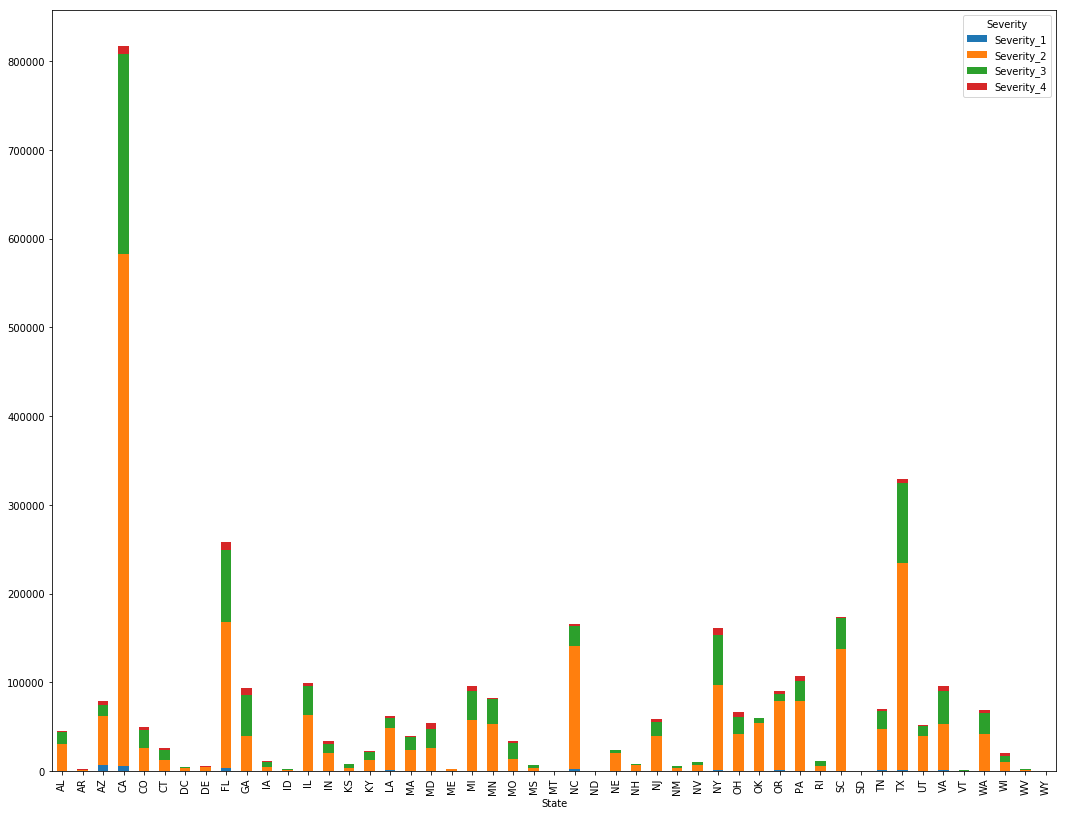

In [15]:
#plt.figure(figsize=(25,18))
state_accident.plot(kind='bar', stacked=True, figsize=(18,14))

#state_accident.plot(figsize=(18,14))


In [16]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium Installed')

Solving environment: done

# All requested packages already installed.

Folium Installed


In [17]:
us_geo =r'US_States.json'
us_map = folium.Map(location=[37, -102], zoom_start=5)


In [18]:
state_accident['Total']=state_accident.sum(axis=1) #adding a Total column

state_accident


Severity,Severity_1,Severity_2,Severity_3,Severity_4,Total
State,,,,,
AL,133.0,30002.0,13890.0,600.0,44625.0
AR,11.0,1011.0,488.0,502.0,2012.0
AZ,6705.0,55091.0,13178.0,3612.0,78586.0
CA,5801.0,576742.0,225820.0,8463.0,816826.0
CO,519.0,25516.0,19888.0,3808.0,49731.0
CT,22.0,12002.0,11632.0,2245.0,25901.0
DC,43.0,2991.0,1099.0,687.0,4820.0
DE,10.0,4288.0,629.0,812.0,5739.0
FL,3014.0,165506.0,80563.0,8919.0,258002.0


In [19]:
# Adding the Full State Name column to match up with the JSON File
state_names=['Alabama','Arkansas','Arizona','California','Colorado','Connecticut','District of Columbia',
             'Delaware','Florida','Georgia','Iowa','Idaho','Illinois','Indiana','Kansas',
             'Kentucky','Louisiana','Massachusetts','Maryland','Maine','Michigan','Minnesota','Missouri',
             'Mississippi','Montana','North Carolina','North Dakota','Nebraska','New Hampshire',
             'New Jersey','New Mexico','Nevada','New York','Ohio', 'Oklahoma','Oregon',
             'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 
             'Texas', 'Utah','Virginia','Vermont','Washington','Wisconsin','West Virginia', 'Wyoming']

state_accident['StateName']=state_names
state_accident


Severity,Severity_1,Severity_2,Severity_3,Severity_4,Total,StateName
State,,,,,,
AL,133.0,30002.0,13890.0,600.0,44625.0,Alabama
AR,11.0,1011.0,488.0,502.0,2012.0,Arkansas
AZ,6705.0,55091.0,13178.0,3612.0,78586.0,Arizona
CA,5801.0,576742.0,225820.0,8463.0,816826.0,California
CO,519.0,25516.0,19888.0,3808.0,49731.0,Colorado
CT,22.0,12002.0,11632.0,2245.0,25901.0,Connecticut
DC,43.0,2991.0,1099.0,687.0,4820.0,District of Columbia
DE,10.0,4288.0,629.0,812.0,5739.0,Delaware
FL,3014.0,165506.0,80563.0,8919.0,258002.0,Florida


## Mapping Accidents by State <a name="Mapping Accidents by State"></a>

In [86]:
us_map = folium.Map(location=[37.09, -95.71], zoom_start=4, tiles='openstreetmap')
us_map.choropleth(
    geo_data=us_geo,
    data=state_accident,
    columns=['StateName','Total'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name= 'Car Accidents')

us_map

## Focusing on California Data <a name='Focusing on California Data'></a>

Having 818K over 3.5 million data points, California accident records are good representation of the US accidents data.  By limiting the size of the dataset, it will improve the performance of the analysis without jeopardizing the quality of the analysis.

We first review the correlation between Wind Speed and Severity.  Then, we look at the Linear Regression of multiple factors of Weather Conditions and Severity.

In [21]:
Calif_accident = car_accident.loc[car_accident['State']=='CA']
Calif_accident.shape

(816826, 27)

## Weather Condition <a name='Weather Condition'></a>

While one would guess that most of the accidents happen in a poor weather condition, we find that majority of the accidents occurred in clear weather condition and very small number of cases occurred in snowing or even foggy conditions.

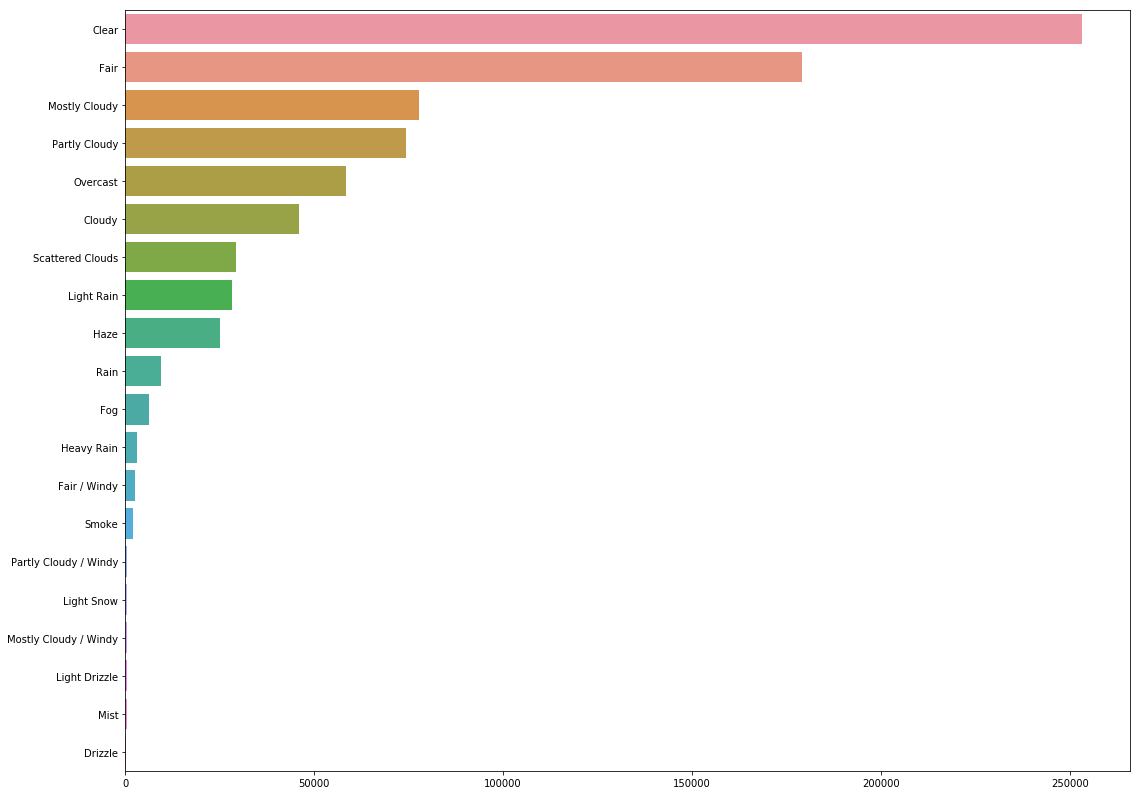

In [24]:
weather_pattern = Calif_accident.Weather_Condition.value_counts().head(20)

plt.figure(figsize =(18,14))
sns.barplot(weather_pattern.values, weather_pattern.index)


## Wind Speed vs Severity<a name="Wind Speed vs Severity"></a>



We want to review the relationship between the Severity level and wind speed.
Applying Linear Regression analysis, we can see a very low score that is quite conclusive to say that there's no correlation between the Wind Speed and Severity.

In [22]:
wind_accident=Calif_accident[['Severity','Wind_Speed(mph)']].copy()
wind_accident.fillna(0,inplace=True)
wind_accident.head()

,Severity,Wind_Speed(mph)
728,3,5.8
729,3,4.6
730,2,4.6
731,3,4.6
732,2,5.8


In [23]:
from sklearn.linear_model import LinearRegression
X = wind_accident[['Wind_Speed(mph)']]
Y = wind_accident[['Severity']]
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.0017048815614110202

In [89]:
from scipy import stats
stats.pearsonr(Calif_accident['Severity'],Calif_accident['Wind_Speed(mph)'])

(0.04129021144787945, 4.731173444384992e-305)

## Individual Weather Factors vs Severity <a name='Individual Weather Factors'></a>

## Temperature

From the correlation, we don't see a big correlation between Temperature and Severity. The Perason Correlation Coefficient is: .024 and p-value is: 5.990 e^-104.

(0.8461768805618731, 4.153823119438128)

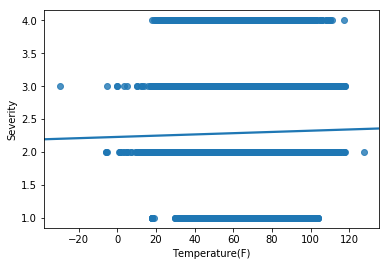

In [25]:
#Looking at the correlation, if any, between individual weather factors and
#severity of accidents
sns.regplot(x='Temperature(F)',y='Severity',data=Calif_accident)
plt.ylim()

In [91]:
stats.pearsonr(Calif_accident['Severity'],Calif_accident['Temperature(F)'])

(0.02395218314186769, 5.989153121752934e-104)

## Wind Chill
From the correlation, we don't see any correlation between Wind Chill and Severity. The Perason Correlation Coefficient is: -.108 and p-value is: 0.000.

(0.8461768805618731, 4.153823119438128)

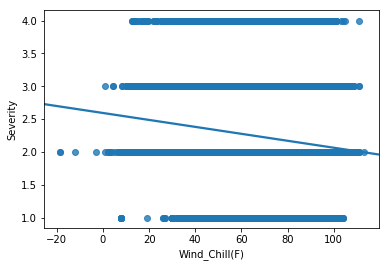

In [26]:
sns.regplot(x='Wind_Chill(F)',y='Severity',data=Calif_accident)
plt.ylim()

In [93]:
stats.pearsonr(Calif_accident['Severity'],Calif_accident['Wind_Chill(F)'])

(-0.10849908577891573, 0.0)

## Humidity

Humidity is another low correlation with Severity.The Perason Correlation Coefficient is: .030 and p-value is: 4.284 e^-157.

(0.8461768805618731, 4.153823119438128)

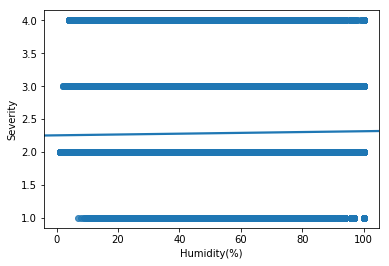

In [27]:
sns.regplot(x='Humidity(%)',y='Severity',data=Calif_accident)
plt.ylim()

In [95]:
stats.pearsonr(Calif_accident['Severity'],Calif_accident['Humidity(%)'])

(0.029539938798180492, 4.2842244391312885e-157)

## Visibility
Visibility and Severity have very little correlation as well. The Perason Correlation Coefficient is: -0.005 and p-value is: 4.008 e^-06.

(0.8461768805618731, 4.153823119438128)

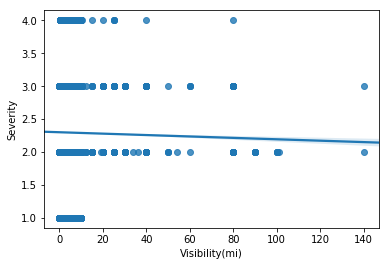

In [28]:
sns.regplot(x='Visibility(mi)',y='Severity',data=Calif_accident)
plt.ylim()

In [96]:
stats.pearsonr(Calif_accident['Severity'],Calif_accident['Visibility(mi)'])

(-0.005101826963224123, 4.0078688619954515e-06)

## Pressure

Air Pressure and Severity have very little correlation as well. The Perason Correlation Coefficient is: .095 and p-value is: 0.0.

(-0.5963764625461522, 4.222516135776606)

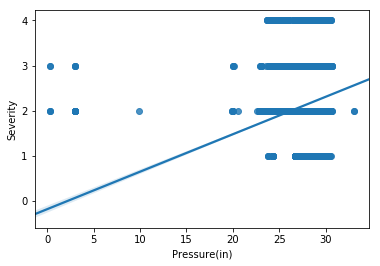

In [29]:
sns.regplot(x='Pressure(in)',y='Severity',data=Calif_accident)
plt.ylim()

In [97]:
stats.pearsonr(Calif_accident['Severity'],Calif_accident['Pressure(in)'])

(0.09525123614477869, 0.0)


## Multiple Regression<a name='Multiple Regression'></a>


We want to look further at the relationships between Severity of an accident (Target) and weather factors, namely, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi),Precipitation(in), and Wind_Speed(mph).

We develop a model using these variables as the predictor variables.



In [30]:
y_data = Calif_accident['Severity']
x_data = Calif_accident[['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Precipitation(in)',
                'Wind_Speed(mph)']]

In [31]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 163366
number of training samples: 653460


In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train[['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)',
                'Visibility(mi)','Precipitation(in)',
                'Wind_Speed(mph)']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
yhat_train = lr.predict(x_train[['Temperature(F)','Wind_Chill(F)',
                                 'Humidity(%)','Pressure(in)','Visibility(mi)',
                                 'Precipitation(in)','Wind_Speed(mph)']])
yhat_train[0:5]

array([2.11865956, 2.27341099, 2.33734683, 2.17071951, 2.35067175])

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [35]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Weather Factors')
    plt.ylabel('Severity Level')

    plt.show()
    plt.close()

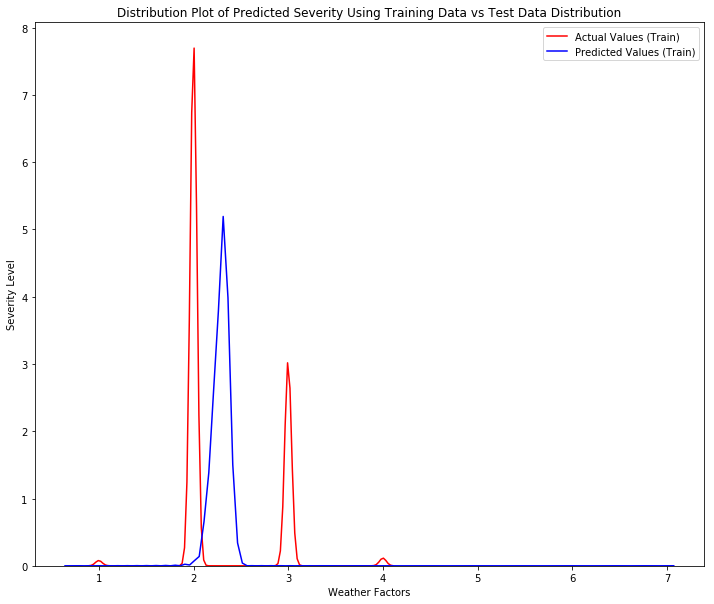

In [36]:
Title = 'Distribution Plot of Predicted Severity Using Training Data vs Test Data Distribution'
DistributionPlot(y_train, yhat_train, 
                 "Actual Values (Train)", "Predicted Values (Train)", Title)

## Ridge Model


In [37]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)',
                'Visibility(mi)','Precipitation(in)',
                'Wind_Speed(mph)']])
x_test_pr=pr.fit_transform(x_test[['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)',
                'Visibility(mi)','Precipitation(in)',
                'Wind_Speed(mph)']])
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
yhat = RidgeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [2.15239507 2.47268982 2.34856686 2.23223706]
test set : [2 2 3 2]


## Grid Search <a name='Grid Search'></a>


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
parameters1= [{'alpha': [0.001, 0.01, 0.1,1, 10, 100, 1000, 10000, 100000]}]
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [40]:
Grid1=GridSearchCV(RR,parameters1,cv=6)
Grid1.fit(x_data[['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)',
                'Visibility(mi)','Precipitation(in)',
                'Wind_Speed(mph)']],y_data)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
BestRR.score(x_test[['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)',
                'Visibility(mi)','Precipitation(in)',
                'Wind_Speed(mph)']], y_test)

0.030479696225644393

## Conclusion:

We've run the correlation tests on individual weather factors and the multiple regression test on the combination of all weather factors and found that their correlations are not good.  We also use Ridge Regression and Grid Search to improve the model and still don't see a good result.

We can conclusively say that weather factors do not give any prediction of Severity of a car accident.